Solução final: [{'inicio': 5, 'destino': 'C', 'bonus': 10}]
Bônus total: 10


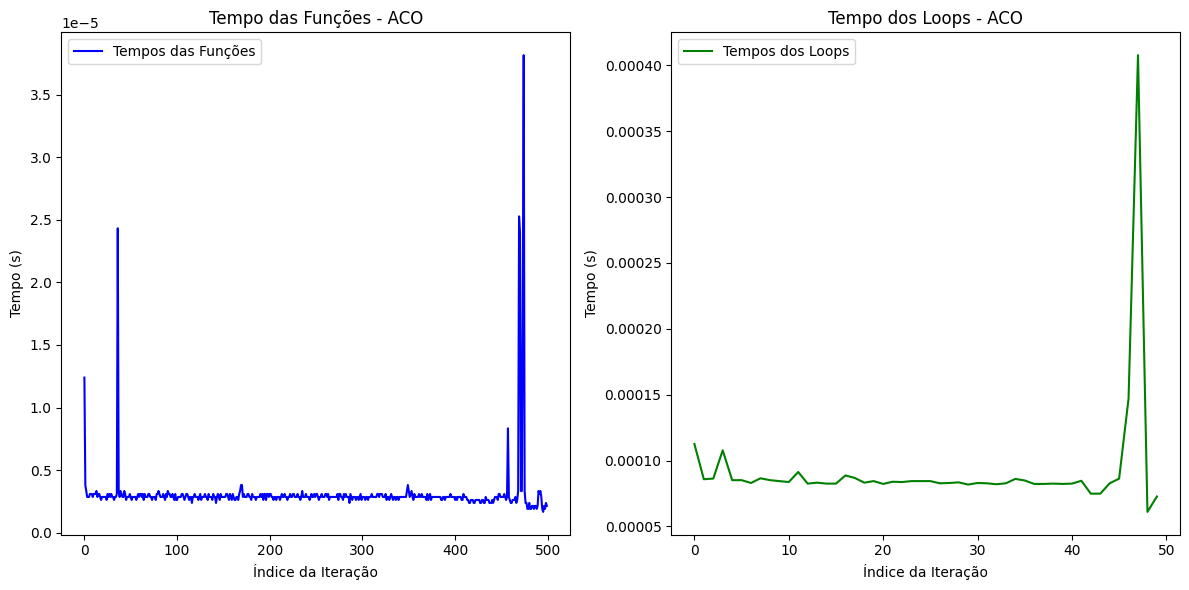

In [3]:
import random
import time
import matplotlib.pyplot as plt

# Definição do grafo e entregas
grafo_conexoes = {
    'A': {'B': 5, 'D': 2},
    'B': {'C': 3, 'A': 5},
    'C': {'B': 3, 'D': 8},
    'D': {'A': 2, 'C': 8},
}

entregas = [
    {'inicio': 0, 'destino': 'B', 'bonus': 1},
    {'inicio': 5, 'destino': 'C', 'bonus': 10},
    {'inicio': 10, 'destino': 'D', 'bonus': 8},
]

def buscar_distancia(grafo, no_origem, no_destino):
    stack = [(no_origem, 0, set())]
    menor_distancia = float('inf')

    while stack:
        no_atual, distancia_atual, visitados = stack.pop()

        if no_atual == no_destino:
            menor_distancia = min(menor_distancia, distancia_atual)
            continue

        visitados.add(no_atual)

        for vizinho, distancia in grafo[no_atual].items():
            if vizinho not in visitados:
                stack.append((vizinho, distancia_atual + distancia, visitados.copy()))

    return menor_distancia if menor_distancia != float('inf') else None

# Parâmetros do ACO
num_formigas = 10
num_iteracoes = 50
evaporacao = 0.5
intensidade_feromona = 1.0

# Inicialização da matriz de feromona
feromona = {(origem, destino): 1.0 for origem in grafo_conexoes for destino in grafo_conexoes[origem]}

def calcular_probabilidade(feromona, distancias, origem, destino):
    return feromona.get((origem, destino), 0.1) / distancias.get((origem, destino), 1.0)

def aco():
    melhor_bônus = 0
    melhor_solução = []

    tempos_funcoes = []  # Inicializa a lista para armazenar tempos da função buscar_distancia
    tempos_loops = []    # Inicializa a lista para armazenar tempos dos loops principais

    for iteracao in range(num_iteracoes):
        todas_solucoes = []

        tempo_loop_start = time.time()  # Início da medição do loop principal

        for _ in range(num_formigas):
            solucao_atual = []
            tempo_atual = 0
            bonus_total = 0
            entregas_restantes = entregas[:]

            for _ in range(len(entregas)):
                if not entregas_restantes:
                    break

                entrega = random.choice(entregas_restantes)
                destino = entrega['destino']
                inicio = entrega['inicio']
                bonus = entrega['bonus']

                if tempo_atual <= inicio:
                    # Medir o tempo de execução da função buscar_distancia
                    tempo_func_start = time.time()
                    distancia = buscar_distancia(grafo_conexoes, 'A', destino)
                    tempos_funcoes.append(time.time() - tempo_func_start)  # Registro do tempo da função

                    if distancia is not None:
                        tempo_atual = inicio + distancia * 2
                        bonus_total += bonus
                        solucao_atual.append(entrega)
                        entregas_restantes.remove(entrega)

                        distancia_retorno = buscar_distancia(grafo_conexoes, destino, 'A')
                        if distancia_retorno is not None:
                            tempo_atual += distancia_retorno

            todas_solucoes.append((solucao_atual, bonus_total))

        tempos_loops.append(time.time() - tempo_loop_start)  # Registro do tempo do loop

        # Atualiza feromona
        for (solucao, bonus) in todas_solucoes:
            for entrega in solucao:
                origem = 'A'
                destino = entrega['destino']
                if (origem, destino) in feromona:
                    feromona[(origem, destino)] += intensidade_feromona * bonus
                    feromona[(origem, destino)] *= (1 - evaporacao)

        if bonus_total > melhor_bônus:
            melhor_bônus = bonus_total
            melhor_solução = solucao_atual

    return tempos_funcoes, tempos_loops, melhor_solução, melhor_bônus

# Executa o ACO e obtém os tempos
tempos_funcoes, tempos_loops, solucao_final, bonus_final = aco()

# Impressão dos resultados
print(f'Solução final: {solucao_final}')
print(f'Bônus total: {bonus_final}')

# Geração dos gráficos com matplotlib
plt.figure(figsize=(12, 6))

# Gráfico de tempo das funções
plt.subplot(1, 2, 1)
plt.plot(tempos_funcoes, label='Tempos das Funções', color='blue')
plt.xlabel('Índice da Iteração')
plt.ylabel('Tempo (s)')
plt.title('Tempo das Funções - ACO')
plt.legend()

# Gráfico de tempo dos loops
plt.subplot(1, 2, 2)
plt.plot(tempos_loops, label='Tempos dos Loops', color='green')
plt.xlabel('Índice da Iteração')
plt.ylabel('Tempo (s)')
plt.title('Tempo dos Loops - ACO')
plt.legend()

plt.tight_layout()
plt.show()
